<a href="https://colab.research.google.com/github/VK-SHRIDHARAN/23BCE2086_IEEE_AI-ML-TASK/blob/main/ALL_LEVELS_23BCE2086___2ND_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving dataset_aiml_task.zip to dataset_aiml_task.zip
Dataset Shape: (60000, 785)
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0       

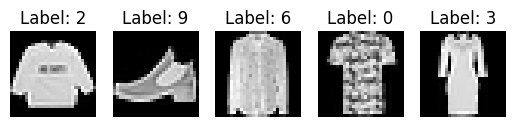

Summary Statistics:
              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.8361

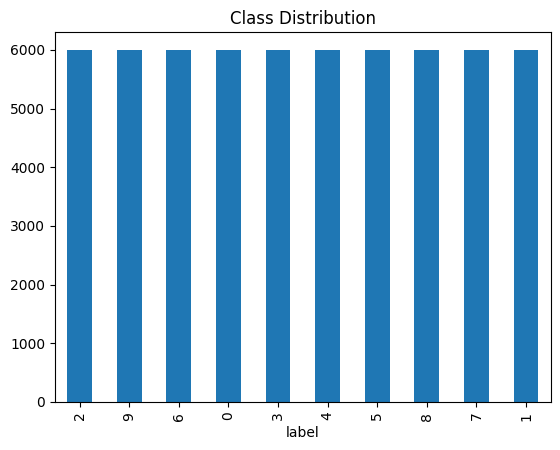

Accuracy: 0.8505
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1232
           1       0.97      0.95      0.96      1174
           2       0.75      0.76      0.76      1200
           3       0.85      0.87      0.86      1242
           4       0.74      0.77      0.75      1185
           5       0.93      0.93      0.93      1141
           6       0.65      0.58      0.61      1243
           7       0.93      0.94      0.93      1224
           8       0.95      0.95      0.95      1149
           9       0.96      0.95      0.96      1210

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7640 - loss: 0.6777 - val_accuracy: 0.8423 - val_loss: 0.4562
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8529 - loss: 0.4027 - val_accuracy: 0.8564 - val_loss: 0.3965
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8776 - loss: 0.3439 - val_accuracy: 0.8737 - val_loss: 0.3480
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8822 - loss: 0.3187 - val_accuracy: 0.8654 - val_loss: 0.3448
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8874 - loss: 0.3050 - val_accuracy: 0.8777 - val_loss: 0.3250
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8896 - loss: 0.2937 - val_accuracy: 0.8825 - val_loss: 0.3254
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8975 - loss: 0.2754 - val_accuracy: 0.8729 - val_loss: 0.3571
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9027 - loss: 0.2608 -

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import zipfile
import os
from google.colab import files

# Upload file manually
uploaded = files.upload()

# Extract the uploaded dataset
zip_path = list(uploaded.keys())[0]  # Get the uploaded file name
dataset_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

# Assuming dataset contains a CSV file
data_csv_path = os.path.join(dataset_path, "dataset_aiml_task/data.csv")

# Level 0: Data Loading and Initial Inspection
def load_data():
    df = pd.read_csv(data_csv_path)
    print("Dataset Shape:", df.shape)
    print(df.head())
    return df

def display_images(df, num_samples=5):
    for i in range(num_samples):
        image = np.array(df.iloc[i, 1:]).reshape(28, 28)
        label = df.iloc[i, 0]
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

# Level 1: Exploratory Data Analysis
def perform_eda(df):
    print("Summary Statistics:")
    print(df.describe())
    df["label"].value_counts().plot(kind="bar")
    plt.title("Class Distribution")
    plt.show()

# Level 2: Logistic Regression Classifier
def logistic_regression(df):
    X = df.iloc[:, 1:].values / 255.0
    y = df.iloc[:, 0].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000, solver='lbfgs')  # Removed deprecated 'multi_class' parameter
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Level 3: Neural Network Classifier
def neural_network(df):
    X = df.iloc[:, 1:].values / 255.0
    y = df.iloc[:, 0].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    loss, acc = model.evaluate(X_test, y_test)
    print("Test Accuracy:", acc)

# Running the steps
df = load_data()
display_images(df)
perform_eda(df)
logistic_regression(df)
neural_network(df)
